# Normalize the data to bring it on the same scale

In [1]:
#import the necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings("ignore")

[(',', 1280), ('.', 446), ('customer', 272), (':', 254), ('(', 229), (')', 229), ('platform', 221), ('product', 219), ('financial', 193), ('?', 189), ('market', 185), ('new', 171), ('payment', 153), ('“', 151), ('data', 151), ('”', 149), ('bank', 145), ('service', 137), ('insurance', 127), ('incumbent', 103), ('’', 102), ('http', 95), ('firm', 93), ('crowdfunding', 91), ('digital', 87), ('technology', 86), ('state', 85), ('%', 84), ('need', 83), ('banking', 79), ('retrieved', 79), ('infrastructure', 76), ('investment', 74), ('cost', 74), ('investor', 72), ('management', 71), ('business', 70), ('risk', 70), ('model', 68), ('online', 68), ('capital', 66), ('provider', 66), ('become', 64), ('insurer', 64), ('industry', 63), ('value', 63), ('partnership', 63), ('traditional', 63), ('shift', 62), ('...', 62), ('lender', 62), ('&', 61), ('institution', 59), ('large', 59), ('solution', 58), ('future', 57), ('tech', 56), ('|finding', 56), ('world', 52), ('offering', 52), ('credit', 52), ('key'

In [2]:
#import the data
df = pd.read_csv("../Data/Mice Data/data_after_mice.csv",header=0,encoding='utf-8')
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_month,issue_year,...,loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off,loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Issued,loan_status_Late_16_30_days,loan_status_Late_31_120_days,pymnt_plan_y,initial_list_status_w,application_type_JOINT
0,5000,5000,4975.00000,36,10.65,162.87,10,24000.00,12,2011,...,0,0,1,0,0,0,0,0,0,0
1,2500,2500,2500.00000,60,15.27,59.83,0,30000.00,12,2011,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.00000,36,15.96,84.33,10,12252.00,12,2011,...,0,0,1,0,0,0,0,0,0,0
3,10000,10000,10000.00000,36,13.49,339.31,10,49200.00,12,2011,...,0,0,1,0,0,0,0,0,0,0
4,3000,3000,3000.00000,60,12.69,67.79,1,80000.00,12,2011,...,0,0,0,0,0,0,0,0,0,0
5,5000,5000,5000.00000,36,7.90,156.46,3,36000.00,12,2011,...,0,0,1,0,0,0,0,0,0,0
6,7000,7000,7000.00000,60,15.96,170.08,8,47004.00,12,2011,...,0,0,0,0,0,0,0,0,0,0
7,3000,3000,3000.00000,36,18.64,109.43,9,48000.00,12,2011,...,0,0,1,0,0,0,0,0,0,0
8,5600,5600,5600.00000,60,21.28,152.39,4,40000.00,12,2011,...,0,0,0,0,0,0,0,0,0,0
9,5375,5375,5350.00000,60,12.69,121.45,0,15000.00,12,2011,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#split the data in 2 dataframe 1 which needs to normalized 
X = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'installment', 'emp_length', 'annual_inc', 'issue_month', 'issue_year',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 
       'application_type_JOINT']].values
z = df [['grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source_Verified', 'verification_status_Verified',
       'loan_status_Current', 'loan_status_Default',
       'loan_status_Does_not_meet_the_credit_policy_Status_Charged_Off',
       'loan_status_Does_not_meet_the_credit_policy_Status_Fully_Paid',
       'loan_status_Fully_Paid', 'loan_status_In_Grace_Period',
       'loan_status_Issued', 'loan_status_Late_16_30_days',
       'loan_status_Late_31_120_days', 'pymnt_plan_y', 'initial_list_status_w','int_rate']]

In [4]:
#normalise the data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[1.193e-01 1.193e-01 1.187e-01 8.589e-04 3.886e-03 2.386e-04 5.726e-01
  2.863e-04 4.798e-02 6.597e-04 0.000e+00 2.386e-05 7.158e-05 0.000e+00
  3.256e-01 1.997e-03 2.147e-04 0.000e+00 0.000e+00 1.398e-01 1.391e-01
  1.193e-01 2.054e-02 0.000e+00 0.000e+00 0.000e+00 4.095e-03 0.000e+00
  0.000e+00 0.000e+00 6.516e-01 2.076e-01 0.000e+00]
 [6.732e-02 6.732e-02 6.732e-02 1.616e-03 1.611e-03 0.000e+00 8.079e-01
  3.231e-04 5.415e-02 2.693e-05 0.000e+00 1.346e-04 8.079e-05 0.000e+00
  4.543e-02 2.531e-04 1.077e-04 0.000e+00 0.000e+00 2.716e-02 2.716e-02
  1.229e-02 1.172e-02 0.000e+00 3.153e-03 2.989e-05 3.222e-03 0.000e+00
  0.000e+00 0.000e+00 1.274e-01 5.574e-01 0.000e+00]
 [1.525e-01 1.525e-01 1.525e-01 2.287e-03 5.357e-03 6.353e-04 7.784e-01
  7.624e-04 1.278e-01 5.540e-04 0.000e+00 1.271e-04 1.271e-04 0.000e+00
  1.878e-01 6.258e-03 6.353e-04 0.000e+00 0.000e+00 1.908e-01 1.908e-01
  1.525e-01 3.835e-02 0.000e+00 0.000e+00 0.000e+00 4.129e-02 0.000e+00
  0.000e+00 0.000e+00 4.153e-0

In [5]:
df1 = pd.DataFrame(normalizedX)


In [6]:
df1.columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'installment', 'emp_length', 'annual_inc', 'issue_month', 'issue_year',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 
       'application_type_JOINT']

In [7]:
df1.to_csv('../Data/Original Data/normalized.csv')

In [8]:
z.to_csv('../Data/Original Data/non_normalized_data.csv')

In [9]:
df2 = pd.read_csv("../Data/Mice Data/data_after_mice.csv",header=0,encoding='utf-8')

In [10]:
size = df2.shape[0]

rs = 1

Train, Test = train_test_split(df2, test_size= 0.3, random_state= rs)


CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)

print(Train.shape, CV.shape, Test.shape)

(621092, 92) (133091, 92) (133092, 92)


# Calculating the correlation with interest rate after normalization

Text(0.5, 0, 'Correlation with int_rate')

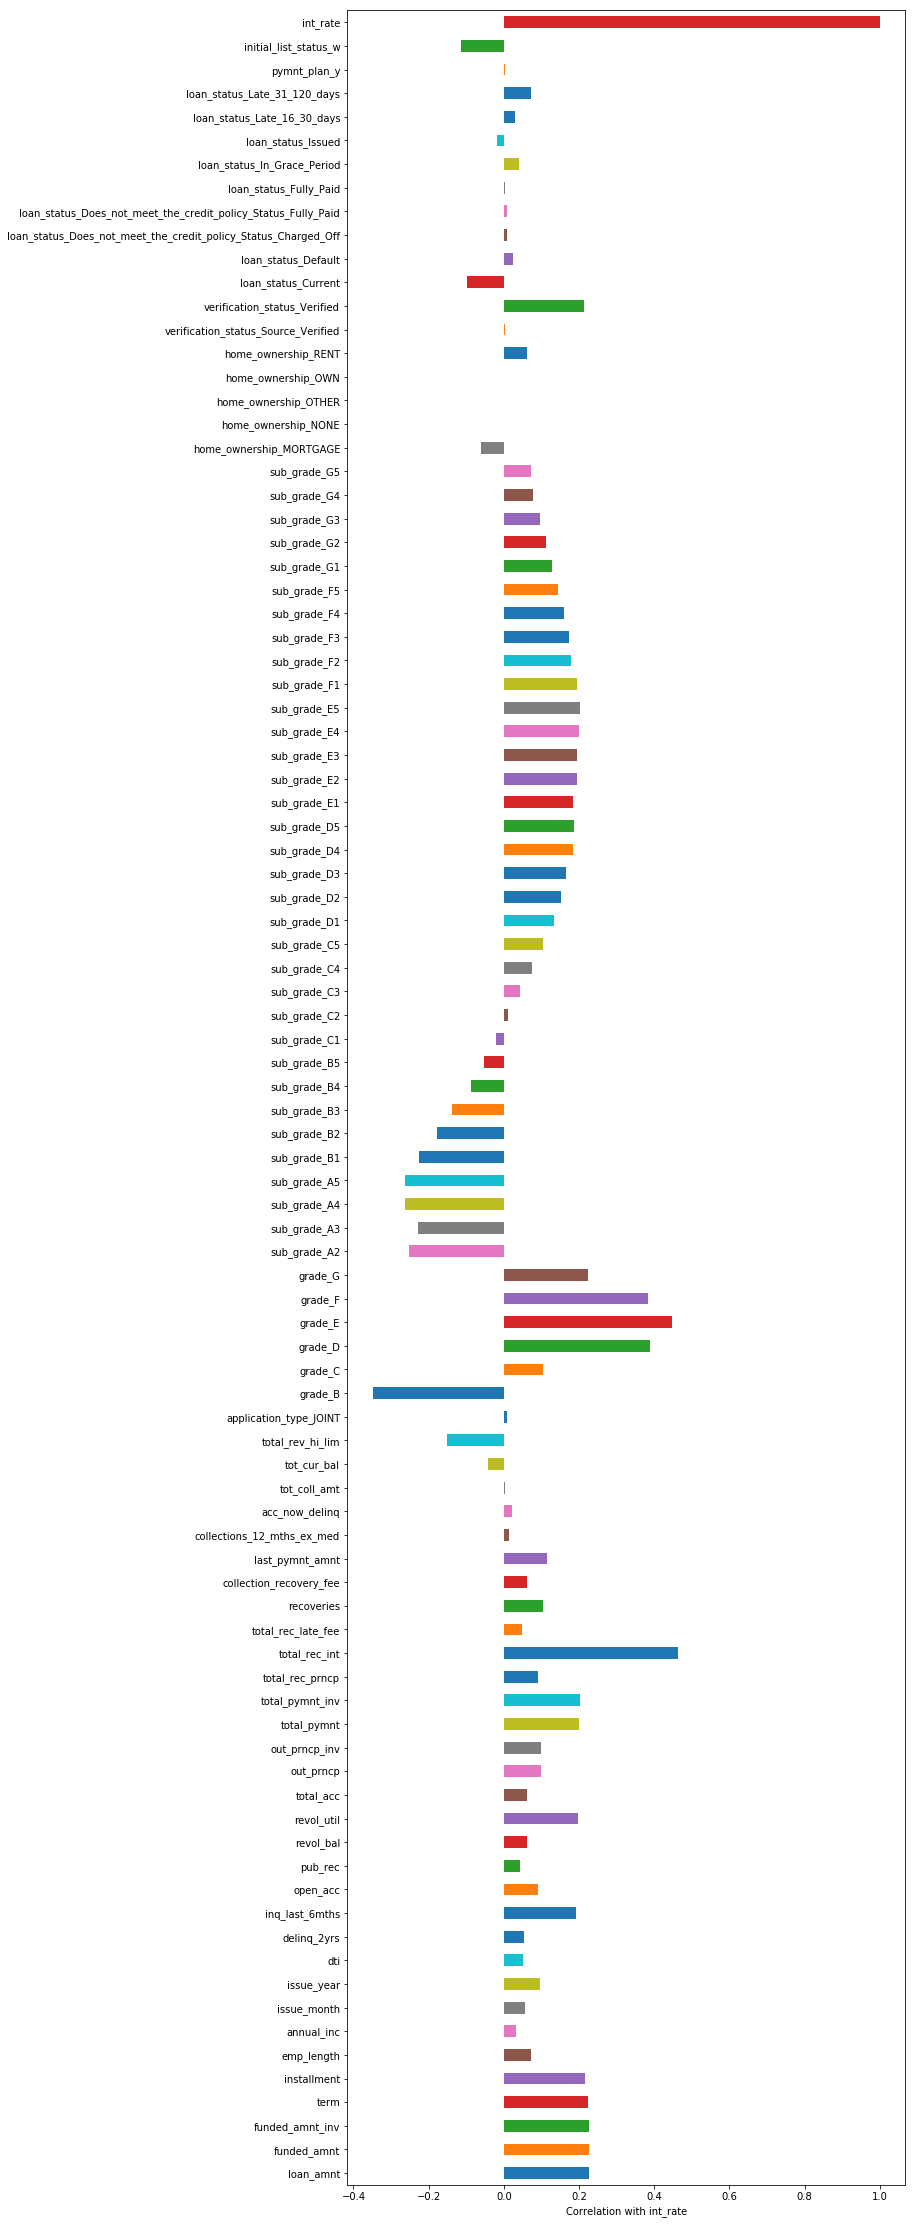

In [11]:
ax = Train.corr()['int_rate'].plot(kind = "barh",figsize = (10,40))
ax.set_xlabel('Correlation with int_rate')

# Visualisation of distribution of data in box plot

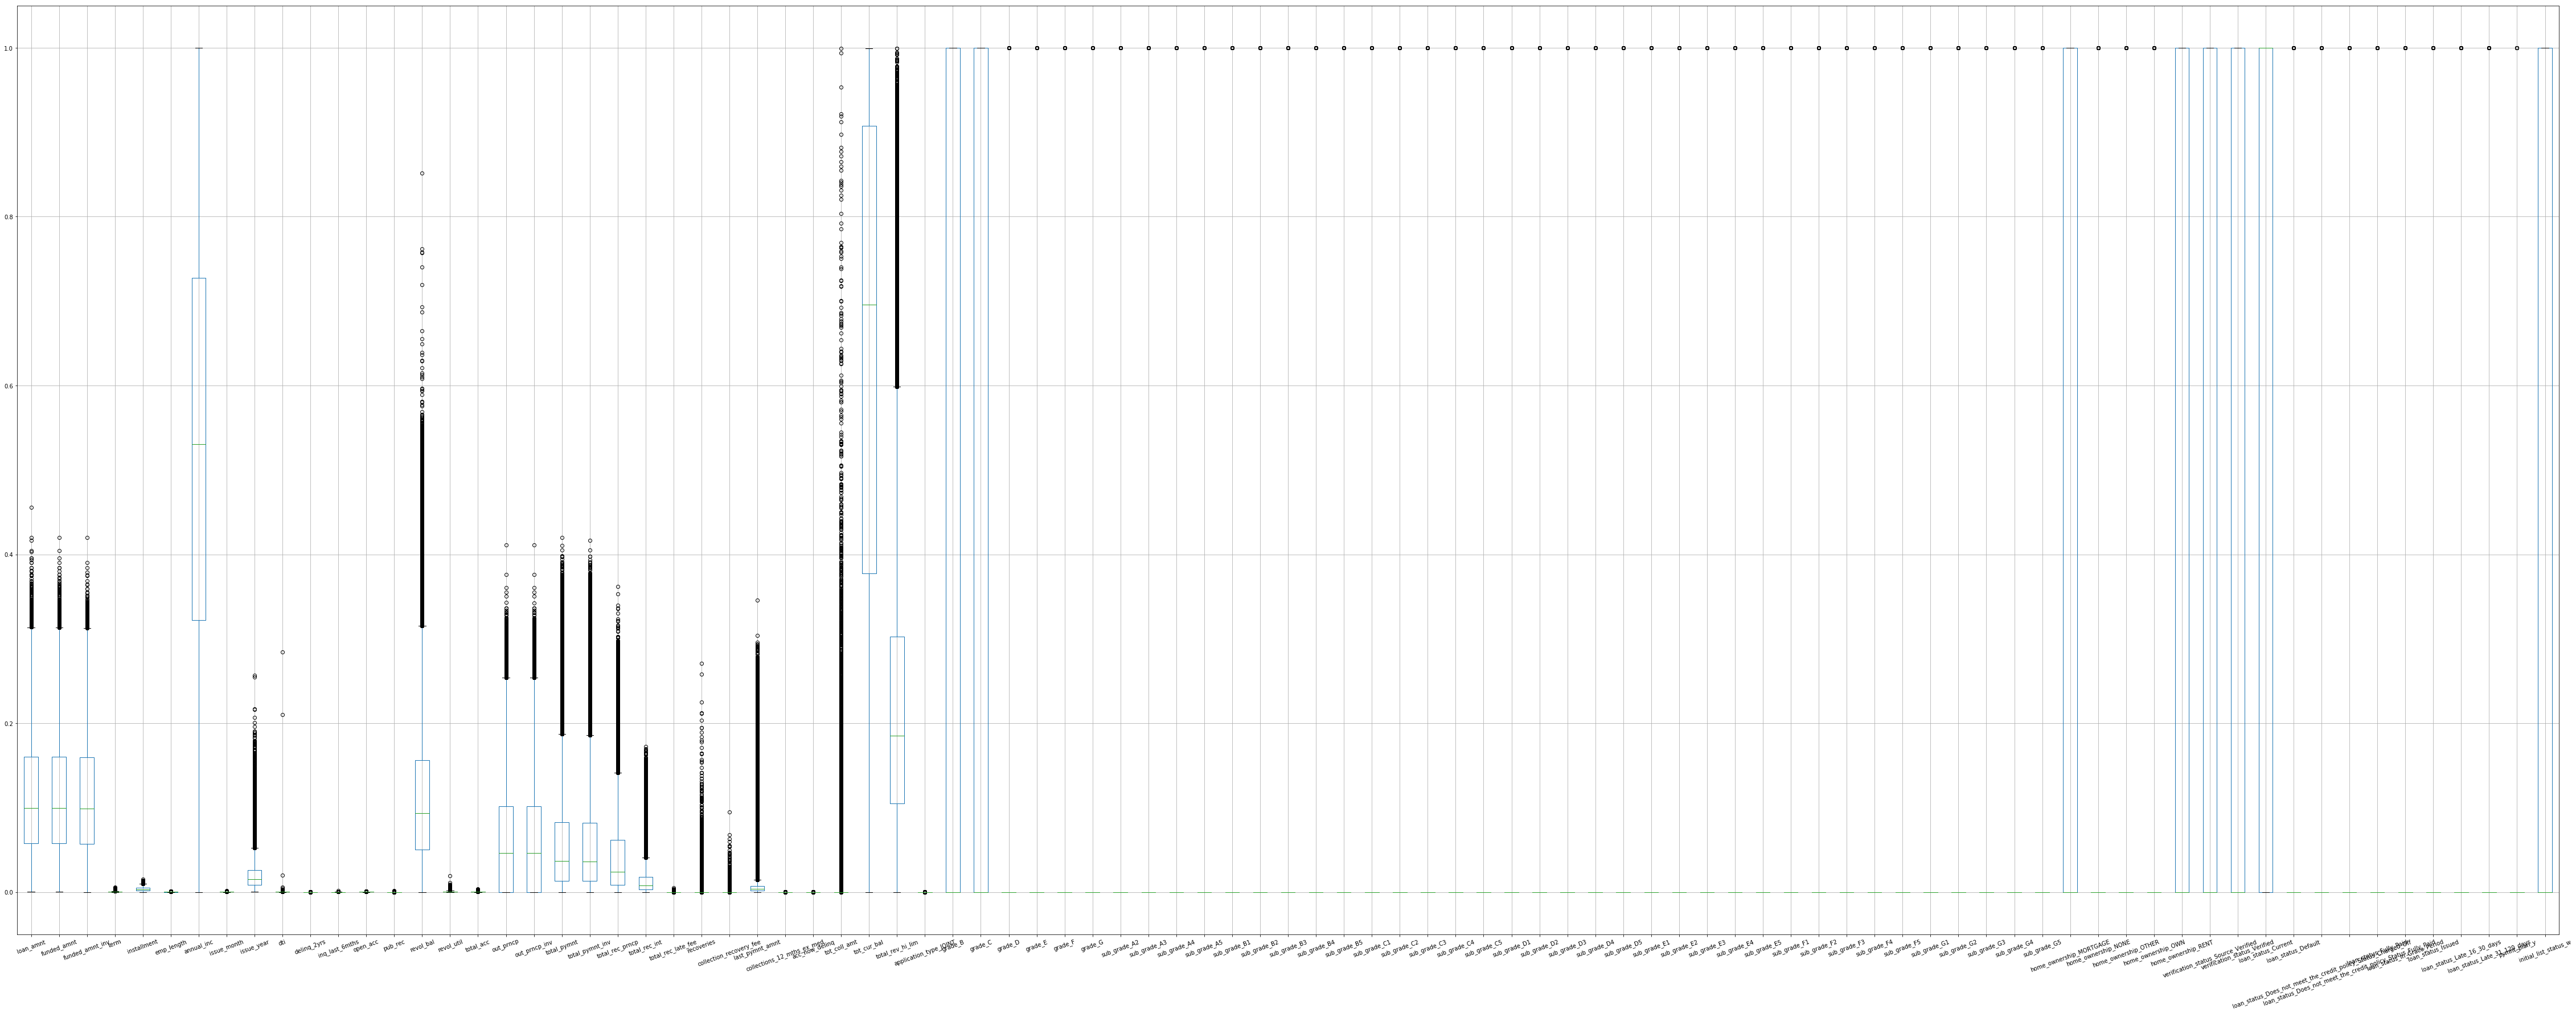

In [12]:
ax = Train.drop(["int_rate"], axis = 1).boxplot(figsize=(80,30),rot=20)